In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Load: Banglore home prices dataset

In [106]:
data = pd.read_csv("bengaluru_house_prices.csv")

In [107]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [108]:
data.shape

(13320, 9)

In [109]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [111]:
data.groupby('area_type')['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [112]:
# Drop Unnecessary column
data = data.drop(['area_type','balcony','society','availability'],axis = 1)

In [113]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [114]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


# Data Cleaning: Handle NA values

In [115]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [116]:
# Find the Percentage of misssing value
round(data.isnull().sum().sort_values(ascending=False)/len(data)*100,2)

bath          0.55
size          0.12
location      0.01
total_sqft    0.00
price         0.00
dtype: float64

In [117]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [118]:
# Lets fill the missing value
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [119]:
data['location'] = data['location'].fillna('Whitefield')

In [120]:
data.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [121]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [122]:
data['size'] = data['size'].fillna('2 BHK')

In [123]:
data.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [124]:
# drop the Null values
data = data.dropna(subset=['bath'])

In [125]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [126]:
data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

# Feature Engineering


###### **Add New Feature(integer) for BHK(Bedrooms Hall Kitchen)**

In [127]:
# data['bhk'] = data['size'].str.split(' ')[0]
data['bhk'] = data['size'].str.split(' ').str.get(0).astype(int)

In [128]:
data['bhk'].value_counts()

2     5527
3     4833
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [129]:
# Outliers in my data
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [130]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Above shows that **total_sqft** can be a range (e.g. 2100-2850). For such case we can just **take average of min and max value in the range**. There are other cases such as **34.46Sq.** Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple.

In [131]:
# converting into float and take average of like 1145 - 1340, 3067 - 8156, 2100 - 2850
def convert_float(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [132]:
data['total_sqft'] = data['total_sqft'].apply(convert_float)

In [133]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [134]:
(2100+2850)/2

2475.0

it shows total_sqft as **2475** which is an average of the range **2100-2850**

In [135]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Feature Engineering

Add New Feature called **price per square feet**

In [136]:
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [137]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [138]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13201.000000,13247.000000,13247.000000,13247.000000,1.320100e+04
mean,1555.306169,2.692610,112.387400,2.801917,7.920566e+03
std,1237.276637,1.341458,149.071136,1.295710,1.067231e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267782e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438066e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [139]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [140]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [141]:
print("Unique Location is >> {}".format(len(data.location.unique())))

Unique Location is >> 1304


In [142]:
data.location = data.location.apply(lambda y: y.strip())

location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats.nlargest(60))

location
Whitefield                  536
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Hosa Road                    72

In [143]:
location_stats.values.sum()

13247

In [144]:
len(location_stats[location_stats<=10])

1052

# Dimensionality Reduction

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [145]:
location_stats_less_10 = location_stats[location_stats <= 10]
print(location_stats_less_10.nlargest(50))

location
Basapura                   10
1st Block Koramangala      10
Gunjur Palya               10
Kalkere                    10
Sector 1 HSR Layout        10
Dairy Circle               10
Naganathapura              10
Sadashiva Nagar            10
Nagadevanahalli            10
BTM 1st Stage              10
Nagappa Reddy Layout       10
Dodsworth Layout           10
Ganga Nagar                10
2nd Phase JP Nagar          9
Volagerekallahalli          9
Yemlur                      9
4th Block Koramangala       9
Lingarajapuram              9
Medahalli                   9
Kaverappa Layout            9
Gollahalli                  9
Richmond Town               9
Vishwanatha Nagenahalli     9
Chennammana Kere            9
KUDLU MAIN ROAD             9
Banagiri Nagar              9
Peenya                      9
Ejipura                     9
Vignana Nagar               9
Mathikere                   9
Chandra Layout              9
Jakkur Plantation           9
Kamakshipalya               9
B

In [146]:
len(data.location.unique())

1293

In [147]:
data.location = data.location.apply(lambda x: 'other' if x in location_stats_less_10 else x)

len(data.location.unique())

242

In [148]:
data.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9405,Channasandra,2 BHK,1093.0,2.0,37.00,2,3385.178408
12776,Sarjapura - Attibele Road,3 BHK,1555.0,3.0,52.00,3,3344.051447
12453,Sector 2 HSR Layout,2 BHK,1231.0,2.0,66.00,2,5361.494720
12695,7th Phase JP Nagar,2 BHK,1128.0,2.0,60.00,2,5319.148936
8794,other,3 BHK,1707.0,3.0,171.00,3,10017.574692
10113,Marathahalli,2 BHK,1240.0,2.0,55.00,2,4435.483871
10626,Malleshwaram,2 Bedroom,600.0,1.0,90.00,2,15000.000000
6606,other,9 Bedroom,1200.0,7.0,95.00,9,7916.666667
218,other,3 BHK,1415.0,3.0,78.00,3,5512.367491
4350,Hennur Road,2 BHK,1036.0,2.0,59.46,2,5739.382239


In [149]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [150]:
data[data.total_sqft/data.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


**Check above data points. We have 6 bhk apartment with 1020 sqft.
Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [151]:
data.shape

(13247, 7)

In [152]:
data = data[~(data['total_sqft']/data['bhk']<300)]
data.shape

(12503, 7)

# Outlier Removal Using **Standard Deviation** and **Mean**

In [153]:
data.price_per_sqft.describe()

count     12457.000000
mean       6308.427888
std        4167.968413
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [154]:
def remove_Price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    
    for key,subdf in df.groupby('location'):
        
        Mean = np.mean(subdf['price_per_sqft'])
        Std = np.std(subdf['price_per_sqft'])
        
        reduce_df = subdf[(subdf.price_per_sqft >(Mean-Std)) & (subdf['price_per_sqft']<=(Mean+Std))]
        
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
        
    return df_out

In [155]:
data = remove_Price_per_sqft_outliers(data)
print(data.shape)

(10242, 7)


In [156]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

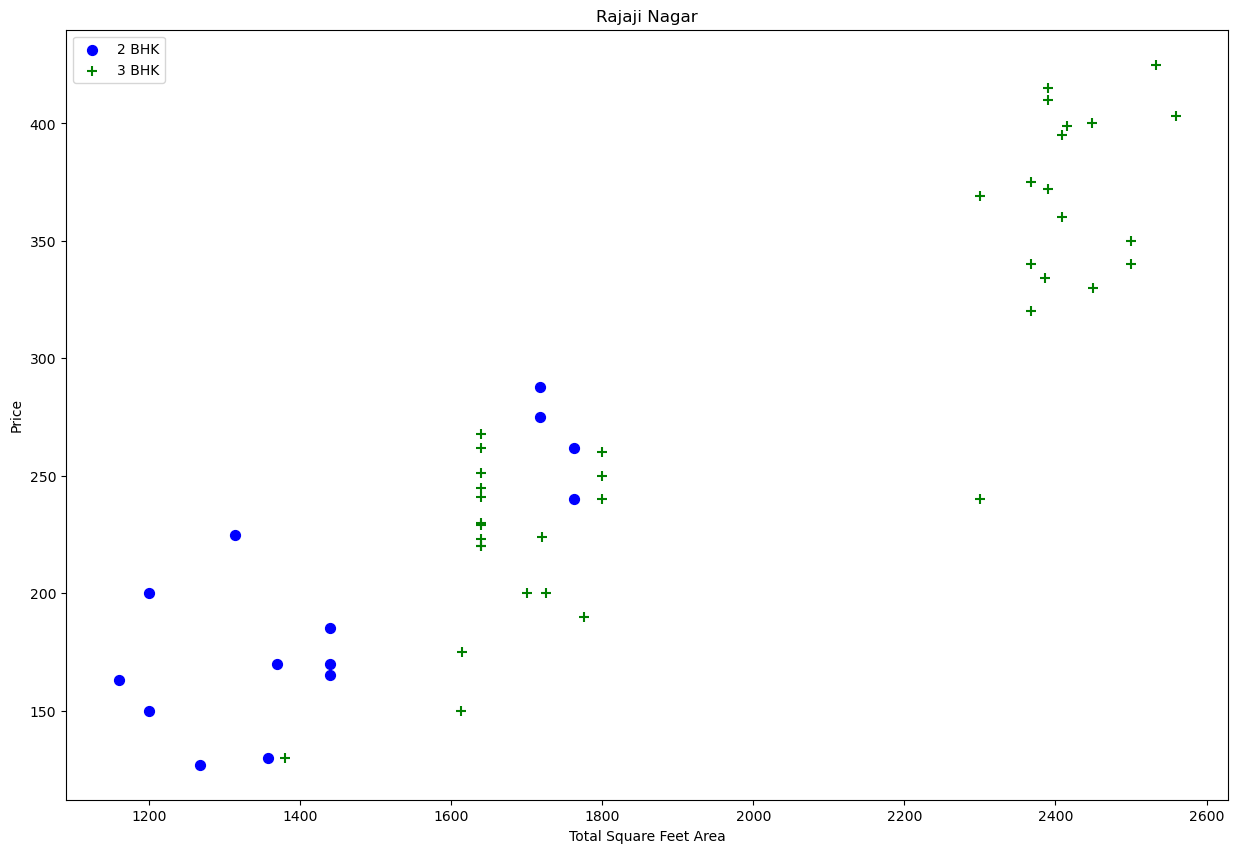

In [157]:
import matplotlib
def create_scatter_chart(df,location):
    
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label ='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    

create_scatter_chart(data,"Rajaji Nagar")    

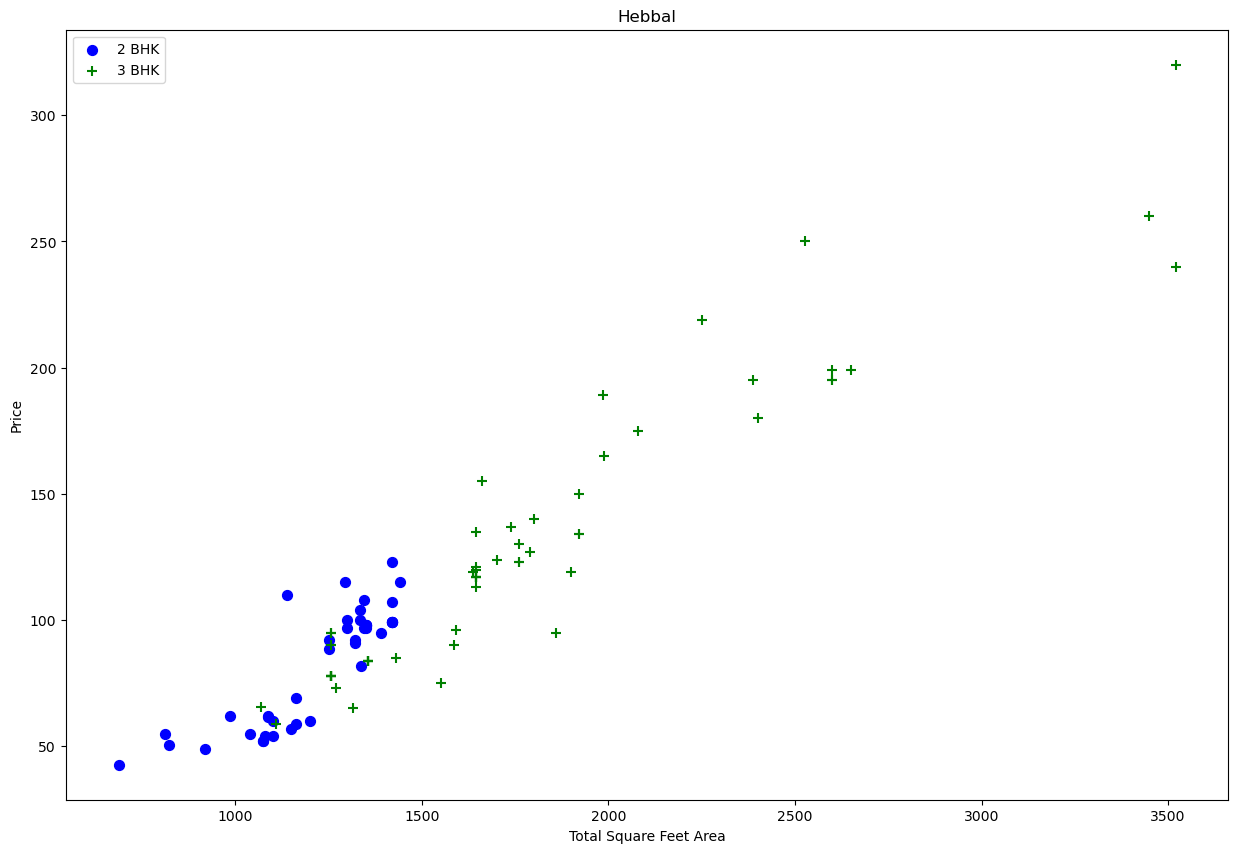

In [158]:
create_scatter_chart(data,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [159]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)
data.shape

(7330, 7)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

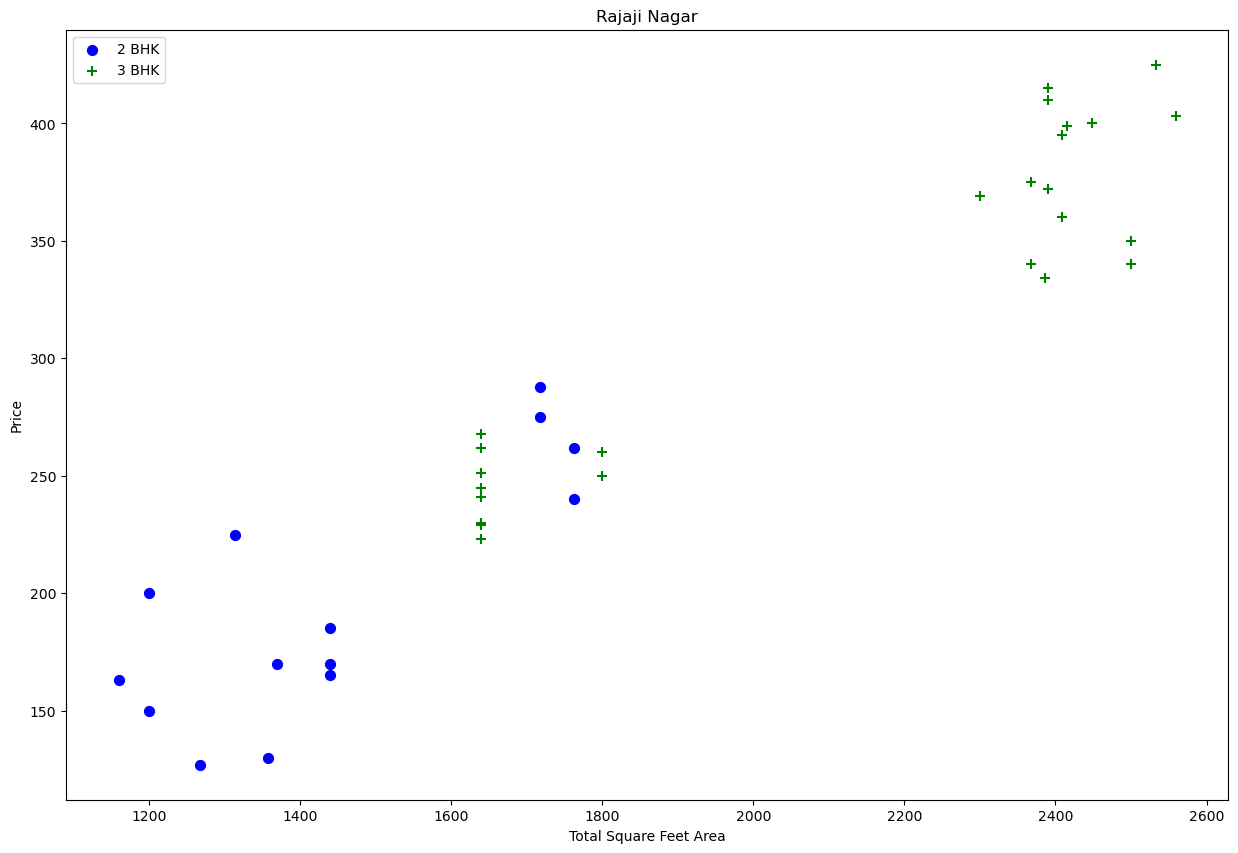

In [160]:
create_scatter_chart(data,"Rajaji Nagar")

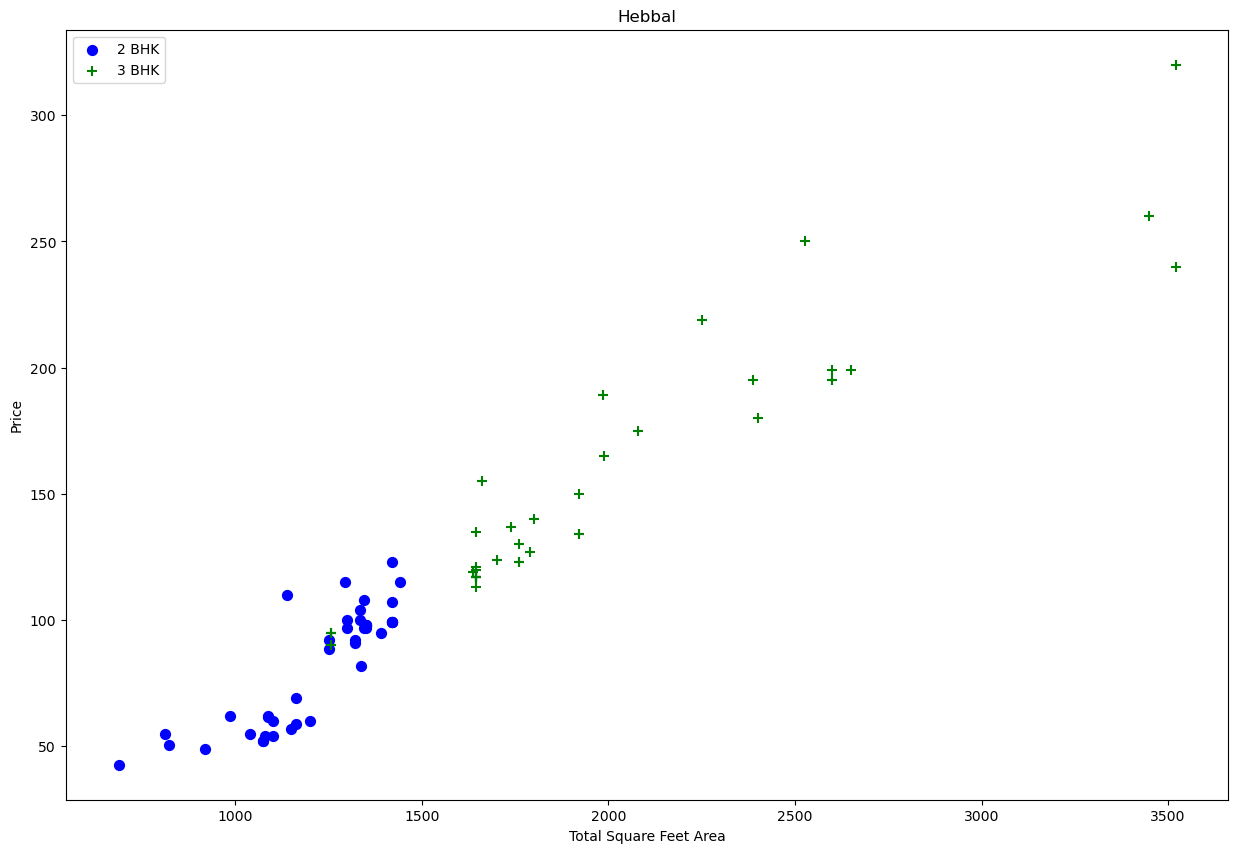

In [161]:
create_scatter_chart(data,"Hebbal")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

# Before and after outlier removal: Rajaji Nagar

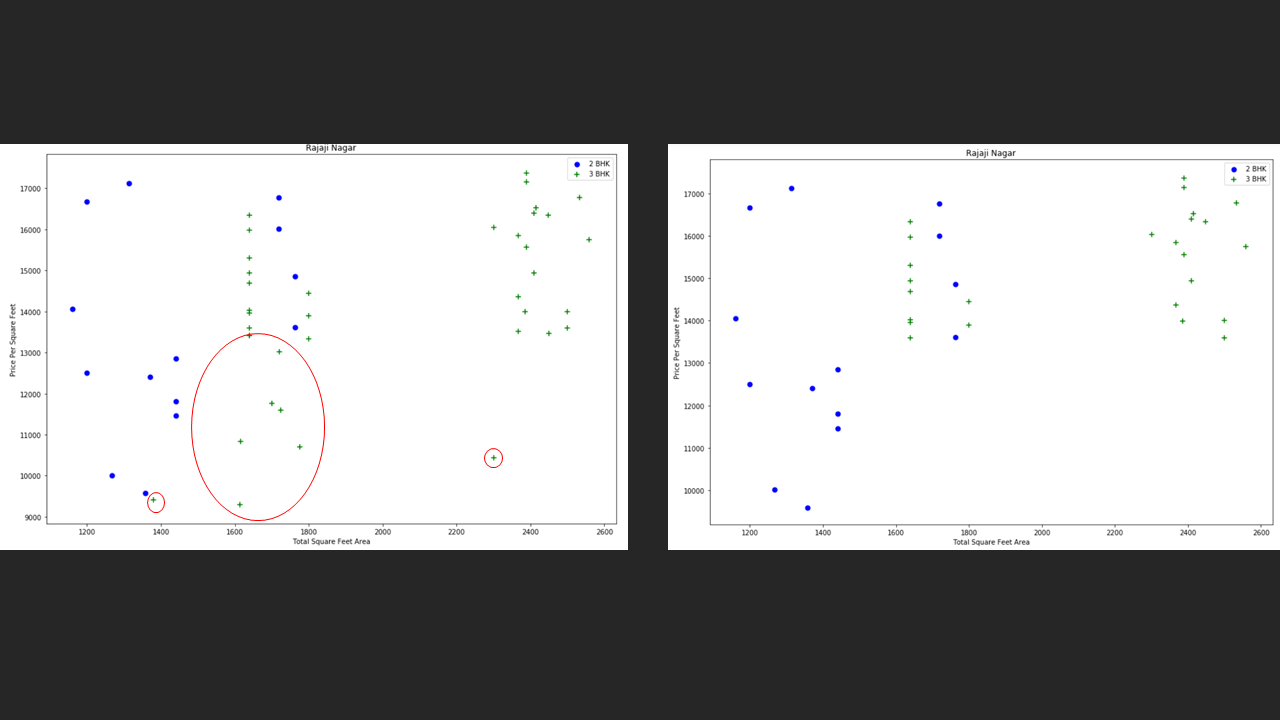

# **Before and after outlier removal in Hebbal**

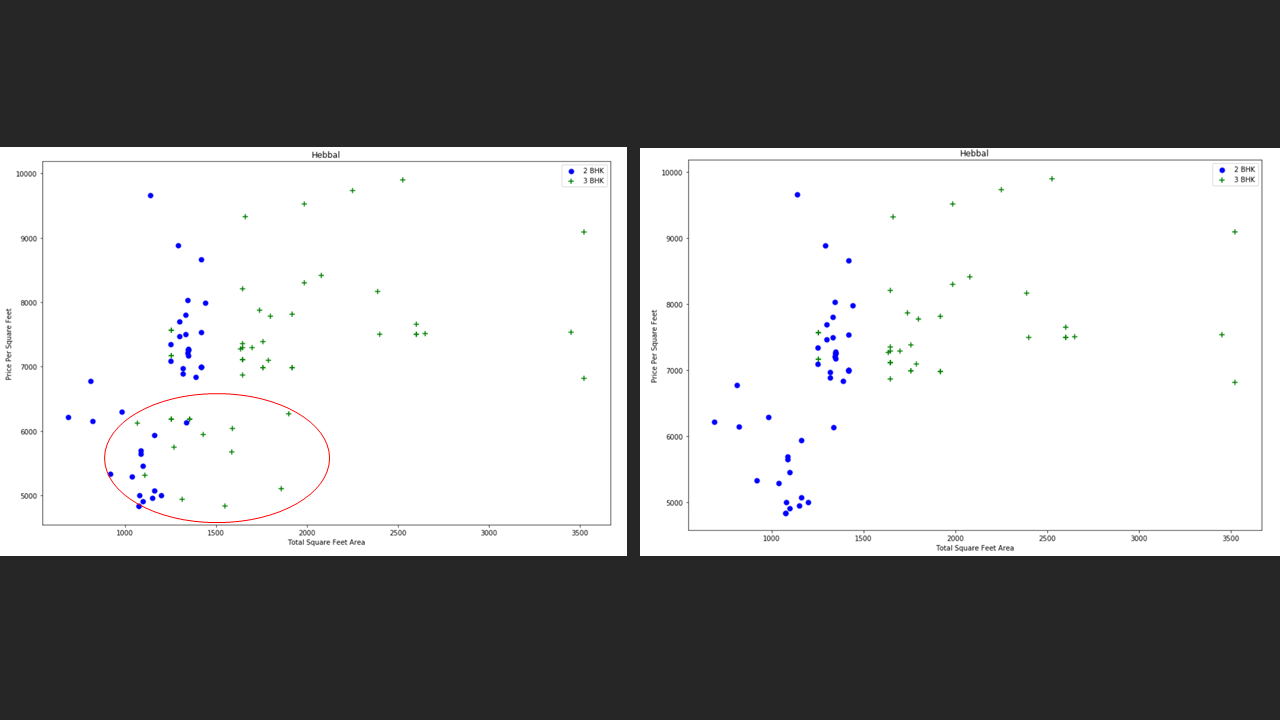

Text(0, 0.5, 'Count')

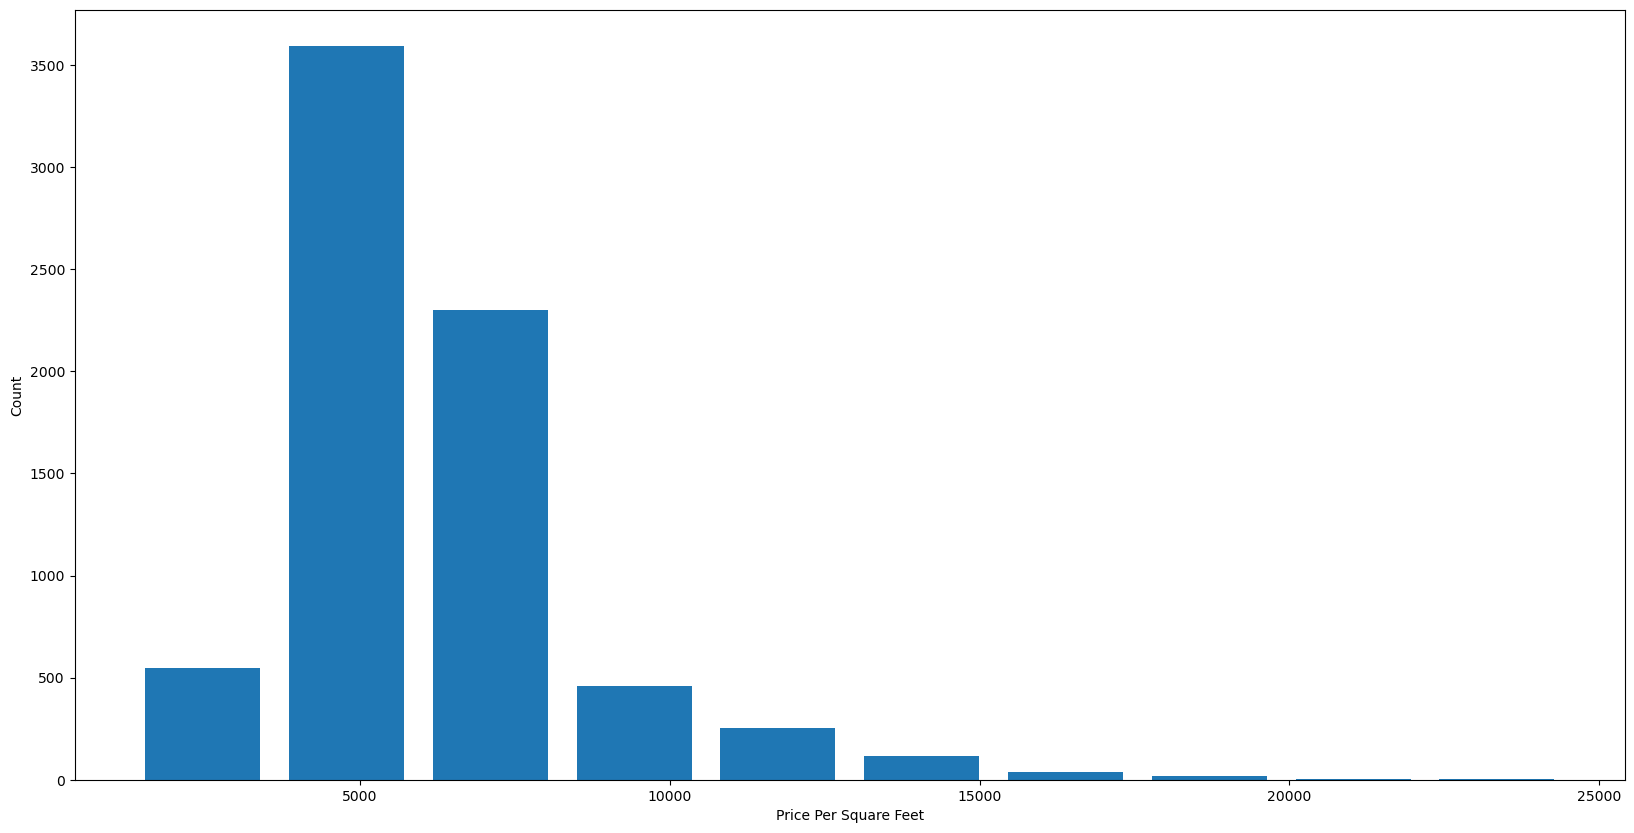

In [162]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature/column

In [163]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

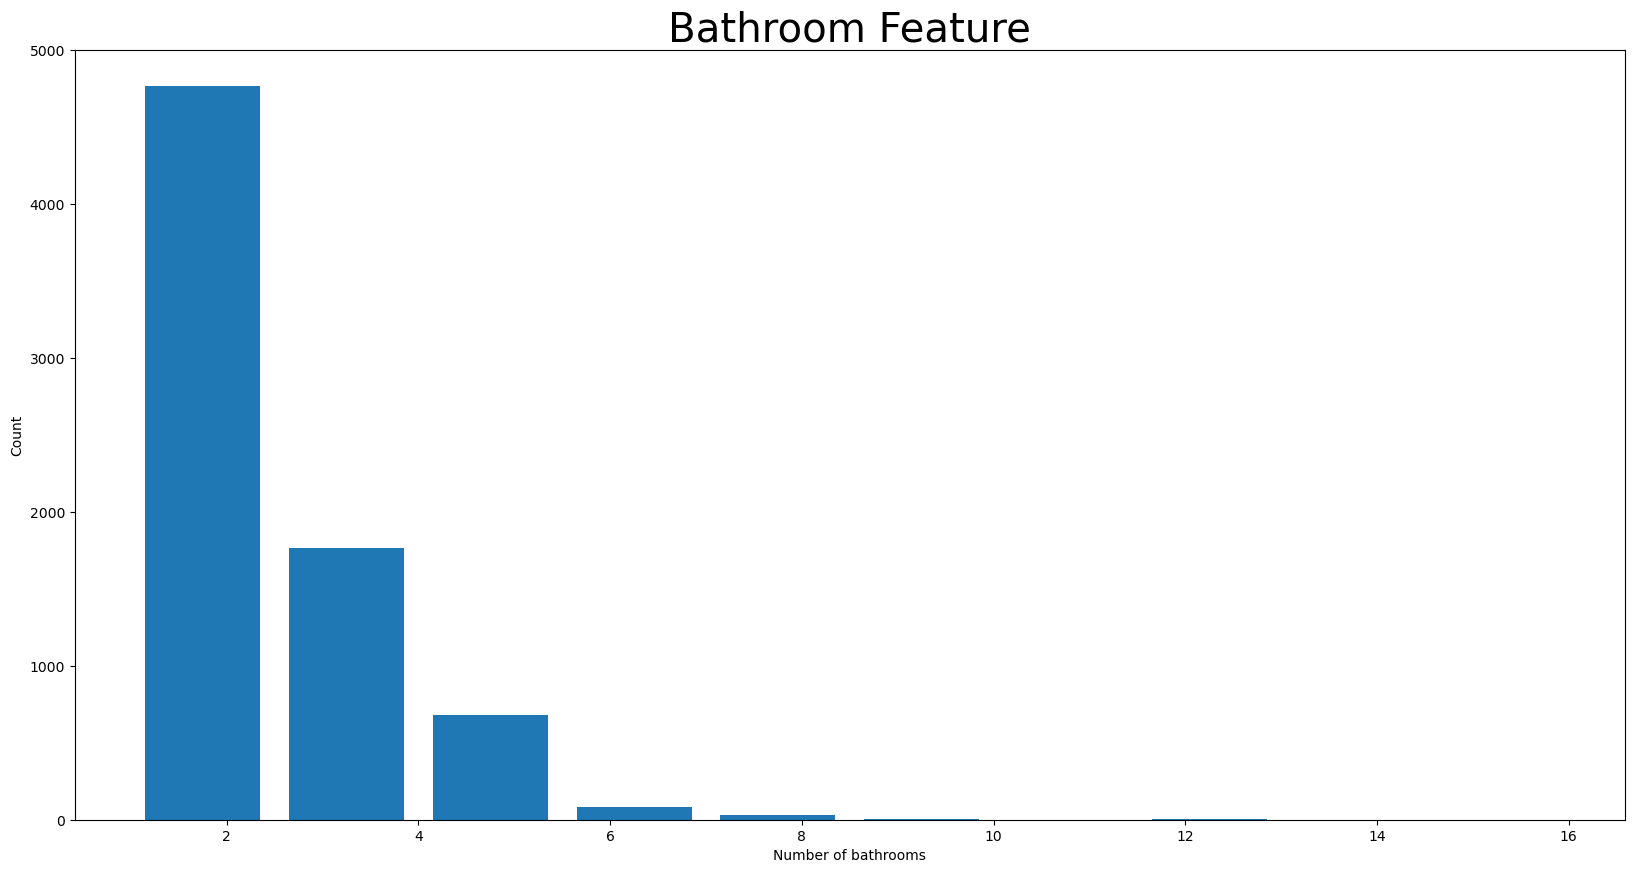

In [164]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.title("Bathroom Feature",size=29)
plt.show()

In [165]:
data[data.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8487,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8576,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9640,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [166]:
data[data.bath>data.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8412,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even
if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max.
Anything above that is an outlier or a data error and can be removed**

In [167]:
data = data[data.bath<data.bhk+2]
data.shape

(7252, 7)

In [168]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


i have drop Unnecessary Feature so the **price_per_sqft** and **size** Feature at this point are unnecessary because **size** we already have **BHK** Feature. and ***Price_per_sqft*** this we used just for **Outlier Detection** and it did not have any other use.We used it only to remove outliers.

In [169]:
data = data.drop(['size','price_per_sqft'],axis=1)
data.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# Use One Hot Encoding For Location:

In [170]:
dummies = pd.get_dummies(data['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df = pd.concat([data,dummies.drop('other',axis=1)],axis=1)

In [172]:
df

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
df = df.drop('location',axis=1)

In [174]:
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build a Model Now...

In [175]:
df.shape

(7252, 245)

In [176]:
X = df.drop("price",axis=1)
y = df.price

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [183]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

lr_model.score(X_test,y_test)

0.888659014968903

In [185]:
from sklearn.metrics import r2_score
y_predict_lr_model = lr_model.predict(X_test)

r2_score(y_test,y_predict_lr_model)

0.888659014968903

# **Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [179]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit ##(ShuffleSplit)randomize the sample and each of the fold have equal distribution of my data sample
from sklearn.model_selection import cross_val_score

randomize_sample = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=randomize_sample)

array([0.82426497, 0.83082053, 0.84273557, 0.84188591, 0.89077716])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

In [77]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# **Find best model using GridSearchCV**

In [78]:
def model_selection_find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                
            }
        },
        'randomforestregressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [200]
            }
        },
        'decision_tree_regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    randomize_sample = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        grid_s_cv = GridSearchCV(config['model'], config['params'], cv=randomize_sample, return_train_score=False)
        grid_s_cv.fit(X, y)

        scores.append({
            'model': algo_name,
            'best_score': grid_s_cv.best_score_,
            'best_params': grid_s_cv.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [79]:
model_selection_find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.847441,{'fit_intercept': False}
1,lasso,0.722214,{'alpha': 1}
2,randomforestregressor,0.828660,{'n_estimators': 200}
3,decision_tree_regressor,0.769302,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Based on the Result we can say that `LinearRegression` gives the best Score. Hence we will use that.**

In [100]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

# **Test the model with Few Inputs**

In [101]:
def Predict_Prices(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0] #Return a index of my given location

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [102]:
Predict_Prices('1st Phase JP Nagar',1000, 2, 2)

87.398182100675

In [104]:
Predict_Prices('1st Block Jayanagar',1000, 3, 4)

171.87787110526295

### Save our Model into Pickle File

In [180]:
import pickle
with open('Bengaluru House Price Prediction Model.Pickle','wb') as f:
    pickle.dump(lr_model,f)

In [187]:
import json

Columns = [col.lower() for col in X.columns]

with open('Columns.json','w') as F:
    F.write(json.dumps(Columns))